In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

## 🧠 Optimization Procedure: Step-by-Step Guide

We are solving the problem:

> **What is the smallest possible sum of squares of two numbers** $S = x^2 + y^2$ **given that** $x \cdot y = -16$?

---

**So we need to minimize the function $S = x^2 + y^2$**

### **Step 1: Reduce the Function to One Variable**

We are given a **constraint**:  
$$
x \cdot y = -16 \Rightarrow y = -\frac{16}{x}
$$

Substitute $y$ into $S = x^2 + y^2$:
$$
S(x) = x^2 + \left(-\frac{16}{x}\right)^2 = x^2 + \frac{256}{x^2}
$$

This is the sum of the squares that we want to minimize. So we need to find minimum value for x. Now $S$ is a function of **one variable**, which allows us to use calculus to minimize it. First and second Derivative tests only apply directly to single-variable functions. 


> ✅ **Note**: The function $S(x)$ is **undefined at $x = 0$**, because of the division by $x^2$:
> $$
> \frac{256}{x^2} \to \frac{256}{0} = \text{undefined}
> $$
> So $x = 0$ is **not in the domain** of $S(x)$, and therefore **cannot** be a candidate for a minimum or maximum.

---

In [2]:
# Step 1: Define F(x, y) and reduce to S(x)

from sympy import symbols, Function, Eq, simplify, solve

# render output (like SymPy equations) using LaTeX formatting
from IPython.display import display

# Define symbolic variables
x, y = symbols('x y')
S = Function('S')
S_xy = S(x,y)

# Define the objective function in two variables: F(x, y) = x^2 + y^2
expr_xy = x**2 + y**2
eq_S_xy = Eq(S_xy, expr_xy)

# Define the constraint: x * y = -16
constraint = Eq(x * y, -16)

# Solve the constraint for y
y_expr = solve(constraint, y)[0] # y = -16 / x

# Define y function
eq_y = Eq(y, y_expr)

#Define S(x) function and its expression
S_x = S(x)
S_x_expr = x**2 + y_expr**2
eq_S_x = Eq(S_x, S_x_expr)

# Display the process
print("Objective function S(x, y):")
display(eq_S_xy)

print("\nConstraint:")
display(constraint)

print("\nSolving constraint for y:")
display(eq_y)

print("\nReduced function S(x):")
display(eq_S_x)

Objective function S(x, y):


Eq(S(x, y), x**2 + y**2)


Constraint:


Eq(x*y, -16)


Solving constraint for y:


Eq(y, -16/x)


Reduced function S(x):


Eq(S(x), x**2 + 256/x**2)

In [3]:
eq_S_x

Eq(S(x), x**2 + 256/x**2)

In [4]:
eq_S_x.rhs

x**2 + 256/x**2

In [5]:
S_x_simplified = simplify(eq_S_x.rhs)
S_x_simplified

(x**4 + 256)/x**2

| **Form**    | **Expression**                        | **Pros**                                                                 |
|-------------|----------------------------------------|--------------------------------------------------------------------------|
| **Expanded** | $x^2 + \dfrac{256}{x^2}$               | It's simpler, cleaner, and friendlier for calculus-based optimization problems — especially when you're still building fluency. |
| **Combined** | $\dfrac{x^4 + 256}{x^2}$               | Useful when solving integrals or simplifying as a single rational function (e.g. partial fractions). |


### **Step 2: Find the Critical Points**

A critical point of a function $S(x)$ is a value of $x$ in the domain where:
- $S(x) =$ defined where x within the domain of S  
- $S'(x) = 0$ or
- $S'(x)$ is undefined

Differentiate $S(x)$:
$$
S'(x) = \frac{d}{dx} \left(x^2 + \frac{256}{x^2}\right) = 2x - \frac{512}{x^3}
$$

Set the derivative equal to 0 to find critical points:
$$
2x - \frac{512}{x^3} = 0
$$

Multiply both sides by $x^3$:
$$
2x^4 - 512 = 0 \Rightarrow x^4 = 256 \Rightarrow x = \pm 4
$$

So, critical points: **$x = -4$ and $x = 4$**

> ⚠️ Also notice: $S'(x)$ is **undefined at $x = 0$**, but this does **not** make $x = 0$ a valid critical point for extremum analysis — because $S(x)$ itself is undefined at $x = 0$. So $x = 0$ **is not in the domain of $S(x)$** and cannot be an extremum.

---

> 📌 The critical points become the **candidates** for the minimum, the maximum, or neither points.  
> To determine which of the **candidates** are real extrema points, we need to conduct the **first derivative test** in the next step.  
> To find whether the candidates are minimum, maximum, or neither, we check **where the sign of $S'(x)$ changes**.

---


In [6]:
# Step 2: Take the derivative of S(x), find critical points

from sympy import diff
from sympy.calculus.util import singularities

# 1. First derivative
S_prime_expr = diff(eq_S_x.rhs, x)
S_prime = Function("S'")(x)
eq_S_prime = Eq(S_prime, S_prime_expr)

# 2. Solve S'(x) = 0 to find critical points
critical_eq = Eq(S_prime_expr, 0)
critical_points = solve(critical_eq, x)

# 3. Determine points where S(x) is undefined, output is a set
undefined_points = singularities(S_x_expr, x)

# 4. Filter out any critical points not in the domain of S(x) and that points are all real-values and not complex numbers
domain_safe_critical_points = [pt for pt in critical_points if pt.is_real and pt not in undefined_points]

# Display
print("Reduced function S(x):")
display(eq_S_x)

print("Points not in domain of S(x):")
display(undefined_points)

print("\nFirst derivative S'(x):")
display(eq_S_prime)

print("\nSolve S'(x) = 0:")
display(critical_eq)

print("\nCritical points (excluding x = 0):")
for pt in domain_safe_critical_points:
    display(pt)

Reduced function S(x):


Eq(S(x), x**2 + 256/x**2)

Points not in domain of S(x):


{0}


First derivative S'(x):


Eq(S'(x), 2*x - 512/x**3)


Solve S'(x) = 0:


Eq(2*x - 512/x**3, 0)


Critical points (excluding x = 0):


-4

4

In [7]:
domain_safe_critical_points

[-4, 4]

In [8]:
critical_points

[-4, 4, -4*I, 4*I]

### **Step 3: First Derivative Test**

The first derivative test helps determine whether a function **f(x)** has a **relative (local) maximum or minimum** at a **critical point** (where the derivative **f'(x) = 0** or **f'(x)** is undefined).

Here's how it works:

- If **f'(x)** changes from **positive to negative** at a point **x = c**, then **f(x)** has a **relative maximum** at **x = c**.
- If **f'(x)** changes from **negative to positive** at **x = c**, then **f(x)** has a **relative minimum** at **x = c**.
- If **f'(x)** **does not change sign** at **x = c** (stays positive or stays negative), then **f(x)** has **no relative extremum** at that point. It might be a point of inflection or just a "flat spot" on an increasing or decreasing interval.

---

So with the first derivative test, we evaluate $S'$ at each interval to see if it is positive or negative on that interval. The critical point is at its maximum if S'(x) switches signs from + to - as we cross x. The other way around, the critical point at its minimum if S'(x) switches signs from - to +. We analyze **where $S'(x)$ is positive or negative** around the critical points.

| Interval        | Test x | $S'(x)$               | Verdict      |
|----------------|--------|------------------------|--------------|
| (-∞, -4)        | -5     | $< 0$                 | Decreasing   |
| (-4, 0)         | -2     | $> 0$                 | Increasing   |
| (0, 4)          | 2      | $< 0$                 | Decreasing   |
| (4, ∞)          | 5      | $> 0$                 | Increasing   |

Interpretation:
- At $x = -4$, $S'(x)$ switches from **negative to positive** → local **minimum**
- At $x = 4$, same switch from **negative to positive** → local **minimum**

> ❌ At $x = 0$, $S(x)$ is undefined. So even though $S'(x)$ is undefined there too, **$x = 0$ is not a valid critical point**, and **cannot** be a local max or min.

---

In [9]:
from sympy import Interval, oo, N

# --- Already provided code ---
# Combine real-valued critical points and undefined points to split intervals
split_points = sorted([
    pt for pt in domain_safe_critical_points + list(undefined_points)
    if pt.is_real
])
# print(f"Split_points: {split_points}") # Optional debug print


# Build test intervals using these split points
test_intervals = (
    [Interval.open(-oo, split_points[0])] +
    [Interval.open(a, b) for a, b in zip(split_points[:-1], split_points[1:])] +
    [Interval.open(split_points[-1], oo)]
)
# print(f"Test Intervals: {test_intervals}") # Optional debug print

# Midpoint function (generic)
def midpoint(interval):
    a, b = interval.start, interval.end
    if a.is_finite and b.is_finite:
        m = (a + b) / 2
        return m if m != 0 else a + (b - a) / 3  # shift slightly if midpoint is 0
    elif a == -oo and b.is_finite:
        return b - 1
    elif a.is_finite and b == oo:
        return a + 1
    else:
        return 1  # fallback if both bounds are infinite


# Evaluate S'(x) in each interval
test_table = []

for interval in test_intervals:
    test_x = midpoint(interval)
    # print(f"Testing midpoint: {test_x}")  # Optional debug print

    slope = S_prime_expr.subs(x, test_x)
    slope_value = N(slope)

    if slope_value.is_real:
        verdict = "Increasing" if slope_value > 0 else "Decreasing"
    else:
        verdict = "Undefined"

    test_table.append({
        "Interval": f"({interval.start}, {interval.end})",
        "Test x": test_x,
        "S'(x)": slope_value,
        "Slope behavior": verdict
    })

# Display table
import pandas as pd
df_test = pd.DataFrame(test_table)
display(df_test)

,Interval,Test x,S'(x),Slope behavior
0,"(-oo, -4)",-5,-5.90400000000000,Decreasing
1,"(-4, 0)",-2,60.0000000000000,Increasing
2,"(0, 4)",2,-60.0000000000000,Decreasing
3,"(4, oo)",5,5.90400000000000,Increasing


---

#### 📘 Step 3: First Derivative Test — Description

This code performs a **first derivative test** to analyze the behavior of the function $S(x)$ around its critical points and discontinuities:

- It starts by combining all **real-valued critical points** (where $S'(x) = 0$) and **undefined points** (where $S(x)$ is not defined, like $x = 0$).
- These points are used to split the number line into **open intervals**.
- For each interval, a **midpoint** is calculated (avoiding problematic values like $x = 0$).
- The code then evaluates the **first derivative** $S'(x)$ at the midpoint of each interval.
- Based on the sign of $S'(x)$, it determines whether $S(x)$ is **increasing** or **decreasing** in that interval.
- The results are collected in a table for further analysis or visualization.

This test helps identify whether a critical point corresponds to a **local minimum**, **maximum**, or **neither**, by checking where the derivative changes sign.



### **Step 4: Second Derivative Test (Concavity Test)**

The second derivative test provides another way to determine whether a critical point is a maximum or minimum, but it requires that the **first derivative is zero** at that point.

Let **x = c** be a point where **f'(c) = 0**.

- If **f''(c) > 0**, the graph is **concave up** at **x = c**, so **f(x)** has a **relative minimum** there.
- If **f''(c) < 0**, the graph is **concave down** at **x = c**, so **f(x)** has a **relative maximum** there.
- If **f''(c) = 0**, the test is **inconclusive** — you need to use the first derivative test or another method to analyze the behavior of the function around that point.

---


Differentiate again:
$$
S''(x) = \frac{d}{dx}\left(2x - \frac{512}{x^3}\right) = 2 + \frac{1536}{x^4}
$$

- For all $x \ne 0$, $S''(x) > 0$ → the graph of function $S(x)$ is **concave up** at all points
- So both critical points are **relative (and global) minima**

---

| Interval        | Test x | $S''(x)$               | Verdict      |
|----------------|--------|------------------------|--------------|
| (-∞, -4)        | -5     | $> 0$                 | Concave Up   |
| (-4, 0)         | -2     | $> 0$                 | Concave Up   |
| (0, 4)          | 2      | $> 0$                 | Concave Up   |
| (4, ∞)          | 5      | $> 0$                 | Concave Up   |


In [10]:
# Step 4: Second Derivative Test — Analyze concavity over the same intervals

from sympy import diff

# 1. Compute second derivative of S(x)
S_double_prime_expr = diff(S_prime_expr, x)
S_double_prime = Function("S''")(x)
eq_S_double_prime = Eq(S_double_prime, S_double_prime_expr)

# 2. Evaluate S''(x) at each midpoint in the test intervals
concavity_table = []

for interval in test_intervals:
    test_x = midpoint(interval)
    concavity_value = N(S_double_prime_expr.subs(x, test_x))

    if concavity_value.is_real:
        verdict = "Concave up" if concavity_value > 0 else "Concave down"
    else:
        verdict = "Undefined"

    concavity_table.append({
        "Interval": f"({interval.start}, {interval.end})",
        "Test x": test_x,
        "S''(x)": concavity_value,
        "Concavity": verdict
    })

# 3. Display results
import pandas as pd
df_concavity = pd.DataFrame(concavity_table)
print("Second Derivative S''(x):")
display(eq_S_double_prime)
display(df_concavity)


Second Derivative S''(x):


Eq(S''(x), 2 + 1536/x**4)

,Interval,Test x,S''(x),Concavity
0,"(-oo, -4)",-5,4.45760000000000,Concave up
1,"(-4, 0)",-2,98.0000000000000,Concave up
2,"(0, 4)",2,98.0000000000000,Concave up
3,"(4, oo)",5,4.45760000000000,Concave up


---

#### 📘 Step 4: Second Derivative Test — Description

This code analyzes the **concavity** of the function $S(x)$ across the same intervals used in Step 3 by applying the **second derivative test**:

- It first computes the **second derivative** $S''(x)$ of the function.
- Then, for each interval between critical points and discontinuities, it selects a **midpoint**.
- It evaluates $S''(x)$ at that midpoint to determine whether the function is:
  - **Concave up** ($S''(x) > 0$)
  - **Concave down** ($S''(x) < 0$)
  - Or **Undefined**
- The result is presented in a table showing the **concavity behavior** of $S(x)$ on each interval.

This step complements the First Derivative Test by giving insight into the **shape of the graph** and helps confirm whether critical points are minima or maxima.


### **Step 5: Minimum Value**

Plug $x = \pm 4$ into $S(x)$:

$$
S(4) = 4^2 + \left(\frac{256}{4^2}\right) = 16 + 16 = \boxed{32}
$$

So, the **minimum sum of squares is 32**, which occurs when:

- $(x, y) = (4, 32)$ or $(-4, 32)$

---


In [11]:
from sympy import N

# Plug in x = 4 and x = -4 into the simplified expression of S(x)
S_at_4 = eq_S_x.rhs.subs(x, 4)
S_at_minus_4 = eq_S_x.rhs.subs(x, -4)

# Optionally get numerical values
S_at_4_val = N(S_at_4)
S_at_minus_4_val = N(S_at_minus_4)

# Display results
print(f"S(4) = {S_at_4_val:.2f}")
print(f"S(-4) = {S_at_minus_4_val:.2f}")


S(4) = 32.00
S(-4) = 32.00


### **Step 6: 📊 Visualization**

- **Top plot**: The graph of $S(x)$ clearly shows **minima at $x = \pm 4$**
- **Middle plot**: $S'(x)$ changes sign from negative to positive at those points
- **Bottom plot**: $S''(x)$ is always positive → confirms concavity is **upwards**

---

#### 🎯 **Goal of Visualization**

- Plot the original function $S(x)$
- Plot its first derivative $S'(x)$ below it
- Plot its second derivative $S''(x)$ below that
- Visually confirm the location of:
  - Local minima / maxima
  - Increasing / decreasing intervals
  - Concave up / down regions
  - Undefined points (e.g., vertical asymptote at $x = 0$)

---

#### ✅ Graphing $S(x)$, $S'(x)$, and $S''(x)$

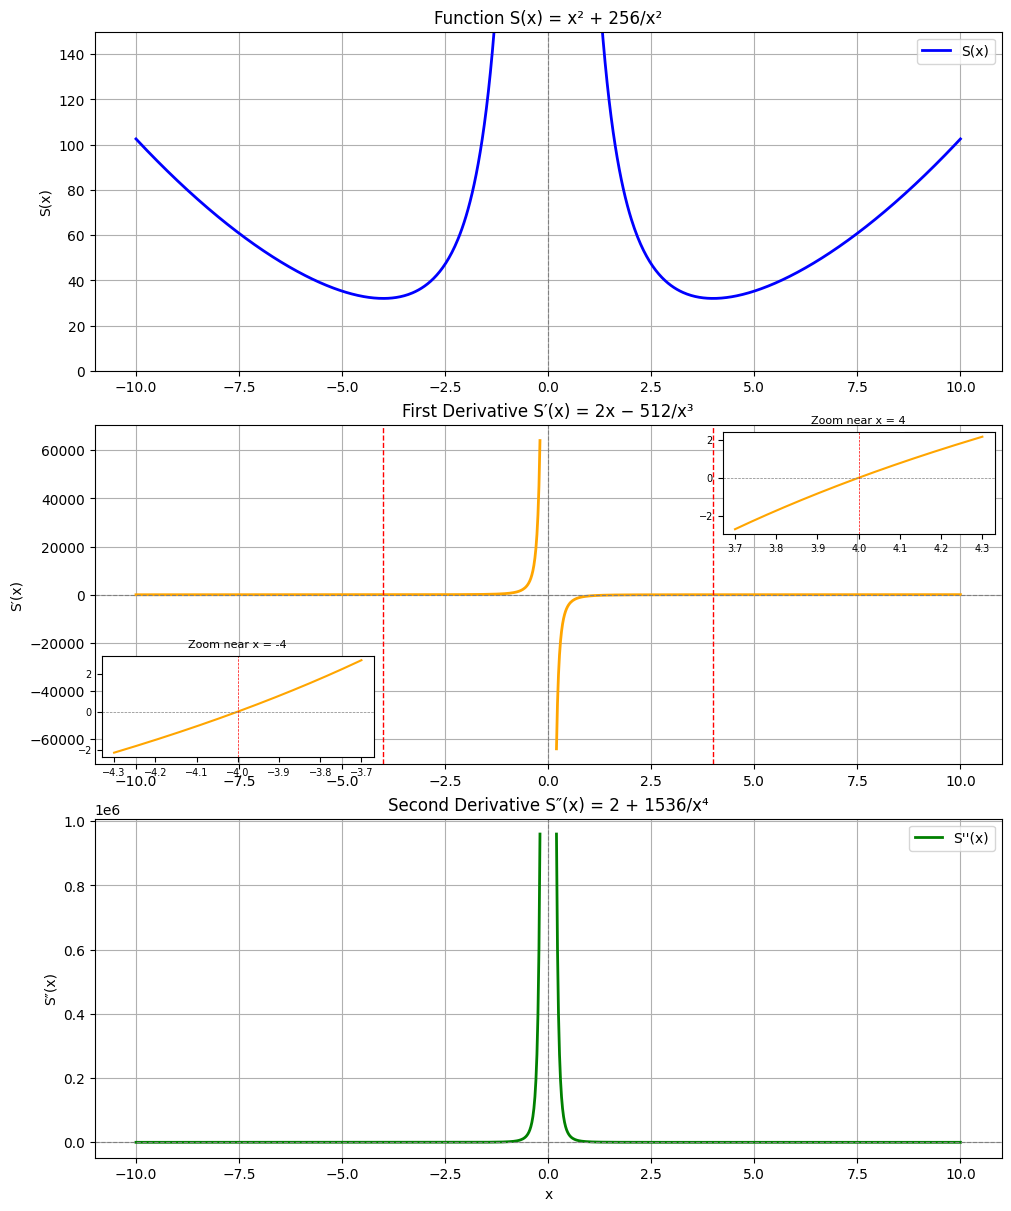

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Convert symbolic expressions to numerical functions
S_func = lambdify(x, S_x_expr, modules=["numpy"])
S_prime_func = lambdify(x, S_prime_expr, modules=["numpy"])
S_double_prime_func = lambdify(x, S_double_prime_expr, modules=["numpy"])

# Define x values (excluding x = 0)
x_vals_left = np.linspace(-10, -0.2, 400)
x_vals_right = np.linspace(0.2, 10, 400)

# Evaluate functions separately on both sides of x = 0. This keeps the graph accurate and clean, showing the true discontinuity at $x = 0$.
y_vals_S_left = S_func(x_vals_left)
y_vals_S_right = S_func(x_vals_right)
y_vals_S_prime_left = S_prime_func(x_vals_left)
y_vals_S_prime_right = S_prime_func(x_vals_right)
y_vals_S_double_prime_left = S_double_prime_func(x_vals_left)
y_vals_S_double_prime_right = S_double_prime_func(x_vals_right)

# ✅ Use constrained layout instead of tight_layout + subplots_adjust. constrained_layout=True emits No warnings.
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True, constrained_layout=True)

# --- Plot S(x) ---
axes[0].plot(x_vals_left, y_vals_S_left, color='blue', label='S(x)', linewidth=2)
axes[0].plot(x_vals_right, y_vals_S_right, color='blue', linewidth=2)
axes[0].set_title("Function S(x) = x² + 256/x²")
axes[0].set_ylabel("S(x)")
axes[0].set_ylim(0, 150) #focus on outer behavior (concavity) by limiting the y-range
# or
# axes[0].set_yscale("log")
axes[0].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
axes[0].grid(True)
axes[0].legend()
axes[0].tick_params(labelbottom=True)

# --- Plot S'(x) ---
axes[1].plot(x_vals_left, y_vals_S_prime_left, label="S'(x)", color='orange', linewidth=2)
axes[1].plot(x_vals_right, y_vals_S_prime_right, color='orange', linewidth=2)
axes[1].set_title("First Derivative S′(x) = 2x − 512/x³")
axes[1].set_ylabel("S′(x)")
axes[1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
axes[1].axvline(x=-4, color='red', linestyle='--', linewidth=1, label='x = -4')
axes[1].axvline(x=4, color='red', linestyle='--', linewidth=1, label='x = 4')
axes[1].grid(True)
axes[1].legend()
axes[1].tick_params(labelbottom=True)

# --- Inset zoom near x = 4 ---
inset_4 = inset_axes(axes[1], width="30%", height="30%", loc='upper right')
x_zoom_4 = np.linspace(3.7, 4.3, 400)
y_zoom_4 = S_prime_func(x_zoom_4)
inset_4.plot(x_zoom_4, y_zoom_4, color='orange')
inset_4.axhline(0, color='gray', linestyle='--', linewidth=0.5)
inset_4.axvline(4, color='red', linestyle='--', linewidth=0.5)
inset_4.set_title("Zoom near x = 4", fontsize=8)
inset_4.tick_params(labelsize=7)

# --- Inset zoom near x = -4 ---
inset_neg4 = inset_axes(axes[1], width="30%", height="30%", loc='lower left')
x_zoom_neg4 = np.linspace(-4.3, -3.7, 400)
y_zoom_neg4 = S_prime_func(x_zoom_neg4)
inset_neg4.plot(x_zoom_neg4, y_zoom_neg4, color='orange')
inset_neg4.axhline(0, color='gray', linestyle='--', linewidth=0.5)
inset_neg4.axvline(-4, color='red', linestyle='--', linewidth=0.5)
inset_neg4.set_title("Zoom near x = -4", fontsize=8)
inset_neg4.tick_params(labelsize=7)

# --- Plot S''(x) ---
axes[2].plot(x_vals_left, y_vals_S_double_prime_left, label="S''(x)", color='green', linewidth=2)
axes[2].plot(x_vals_right, y_vals_S_double_prime_right, color='green', linewidth=2)
axes[2].set_title("Second Derivative S″(x) = 2 + 1536/x⁴")
axes[2].set_ylabel("S″(x)")
axes[2].set_xlabel("x")
axes[2].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axes[2].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
axes[2].grid(True)
axes[2].legend()

# ✅ No need for tight_layout or subplots_adjust — it's all handled
plt.show()



---

#### 🧠 What this shows visually:

| Plot           | What you’ll see |
|----------------|------------------|
| $S(x)$         | The bowl-shaped function with two symmetric arms and a vertical asymptote at $x=0$ |
| $S'(x)$        | Changes sign at $x = -4$ and $x = 4$, confirming minima |
| $S''(x)$       | Positive in outer intervals (concave up), negative in center (concave down) |

---

Let me know if you’d like to annotate the graphs with the actual critical points or vertical asymptotes!

---

#### ✅ Summary

| Key Point | Reason |
|-----------|--------|
| Reduced to one variable | Needed for single-variable calculus |
| $x = 0$ excluded | Not in the domain of $S(x)$ — undefined |
| $S'(x) = 0$ at $x = \pm 4$ | Critical points |
| $S''(x) > 0$ | Confirms these are minima |
| Minimum value | $S = 32$ at $x = \pm 4$ |